In [ ]:
!pip install influxdb_client pandas matplotlib

In [10]:
from influxdb_client import InfluxDBClient

# InfluxDB connection details
url = "http://218.148.55.186:32037"
token = "1sUlWTDrQFWVREAL7u1lpwUyeX70tvWsXk7IOGXC3wI_JupPGKh_qzU_4dP-csvprL2cZlRhBqRfwuXCDqfYKA=="
org = "kitech"
bucket = "mqtt"

client = InfluxDBClient(url=url, token=token, org=org)
query_api = client.query_api()

query = '''
from(bucket: "mqtt")
  |> range(start: -1h)
  |> filter(fn: (r) => r["_measurement"] == "sensor_kitech")
  |> filter(fn: (r) => r["_field"] == "amplitude")
  |> filter(fn: (r) => r["deviceId"] == "todd3367")
'''

# Execute query and get CSV iterator
result = query_api.query_csv(query)

# Save to CSV
with open("output.csv", "w") as f:
    for line in result:
        f.write(",".join(line) + "\n")  # Convert list to CSV row

In [17]:
import pandas as pd

# Load CSV into a DataFrame
df = pd.read_csv("output.csv")

# Display the first few rows
print(df.head())
print(df["_value"])


   Unnamed: 0  result  table                          _start  \
0         NaN     NaN      0  2025-03-18T00:40:13.812957075Z   
1         NaN     NaN      0  2025-03-18T00:40:13.812957075Z   
2         NaN     NaN      0  2025-03-18T00:40:13.812957075Z   
3         NaN     NaN      0  2025-03-18T00:40:13.812957075Z   
4         NaN     NaN      0  2025-03-18T00:40:13.812957075Z   

                            _stop                     _time  _value  \
0  2025-03-18T01:40:13.812957075Z  2025-03-18T00:40:15.972Z    0.04   
1  2025-03-18T01:40:13.812957075Z   2025-03-18T00:40:18.43Z    0.04   
2  2025-03-18T01:40:13.812957075Z  2025-03-18T00:40:20.897Z    0.04   
3  2025-03-18T01:40:13.812957075Z  2025-03-18T00:40:23.402Z    0.04   
4  2025-03-18T01:40:13.812957075Z   2025-03-18T00:40:25.87Z    0.04   

      _field   _measurement  deviceId hardwareVersion   location  \
0  amplitude  sensor_kitech  todd3367           1.0.0  factory-1   
1  amplitude  sensor_kitech  todd3367           1.0.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# Convert '_time' column to datetime format
df['_time'] = pd.to_datetime(df['_time'], format='mixed')

# Sort by time (optional, ensures proper ordering)
df = df.sort_values(by="_time")

In [20]:
print(df.head())

   Unnamed: 0  result  table                          _start  \
0         NaN     NaN      0  2025-03-18T00:40:13.812957075Z   
1         NaN     NaN      0  2025-03-18T00:40:13.812957075Z   
2         NaN     NaN      0  2025-03-18T00:40:13.812957075Z   
3         NaN     NaN      0  2025-03-18T00:40:13.812957075Z   
4         NaN     NaN      0  2025-03-18T00:40:13.812957075Z   

                            _stop                            _time  _value  \
0  2025-03-18T01:40:13.812957075Z 2025-03-18 00:40:15.972000+00:00    0.04   
1  2025-03-18T01:40:13.812957075Z 2025-03-18 00:40:18.430000+00:00    0.04   
2  2025-03-18T01:40:13.812957075Z 2025-03-18 00:40:20.897000+00:00    0.04   
3  2025-03-18T01:40:13.812957075Z 2025-03-18 00:40:23.402000+00:00    0.04   
4  2025-03-18T01:40:13.812957075Z 2025-03-18 00:40:25.870000+00:00    0.04   

      _field   _measurement  deviceId hardwareVersion   location  \
0  amplitude  sensor_kitech  todd3367           1.0.0  factory-1   
1  amplitu

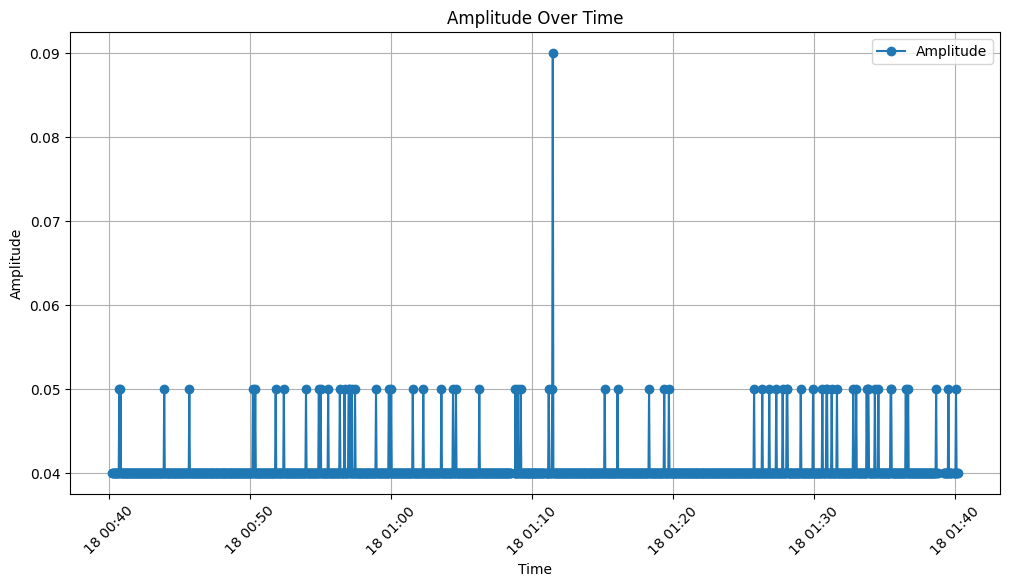

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(df["_time"], df["_value"], marker="o", linestyle="-", label="Amplitude")

# Formatting
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Amplitude Over Time")
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Show the plot
plt.show()
